In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [26]:
pred_rf = pd.read_csv('submit/submit_RF22_2244.csv', names=('id', 'RandomForest'))
pred_xgb = pd.read_csv('submit/submit_XGBoost17_1208.csv', names=('id', 'XGBoost'))
pred_lgb = pd.read_csv('submit/submit_LGBM24_0416.csv', names=('id', 'LightGBM'))
pred_cb = pd.read_csv('submit/submit_CatBoost24_0350.csv', names=('id', 'CatBoost'))
pred_nn = pd.read_csv('submit/submit_NN17_1648.csv', names=('id', 'NN'))
pred_lreg = pd.read_csv('submit/submit_lreg_26_1028.csv', names=('id', 'logreg'))
pred_stack = pd.read_csv('submit/submit_stacking_27_0919.csv', names=('id', 'stacking'))

In [27]:
pred = pd.merge(pred_rf, pred_xgb, on='id')
pred = pd.merge(pred, pred_lgb, on='id')
pred = pd.merge(pred, pred_cb, on='id')
pred = pd.merge(pred, pred_nn, on='id')
pred = pd.merge(pred, pred_lreg, on='id')
pred_df = pd.merge(pred, pred_stack, on='id')
pred_df.head(-10)

,id,RandomForest,XGBoost,LightGBM,CatBoost,NN,logreg,stacking
0,0,0.653176,0.850221,0.359419,0.874176,0.835058,0.884690,0.968949
1,1,0.074268,0.136567,0.092231,0.055457,0.099198,0.058919,0.059116
2,2,0.039741,0.001006,0.050437,0.024032,0.048758,0.030585,0.037907
3,3,0.002598,0.000054,0.035582,0.003217,0.007241,0.028325,0.028462
4,4,0.092913,0.002854,0.071720,0.042077,0.070299,0.033090,0.056696
...,...,...,...,...,...,...,...,...
18035,18035,0.076255,0.013287,0.078328,0.037572,0.022707,0.033253,0.055248
18036,18036,0.054682,0.071169,0.077653,0.066366,0.059807,0.043795,0.055942
18037,18037,0.001582,0.000357,0.034496,0.002404,0.001839,0.028221,0.028393
18038,18038,0.030693,0.000552,0.053604,0.030467,0.009364,0.029916,0.035189


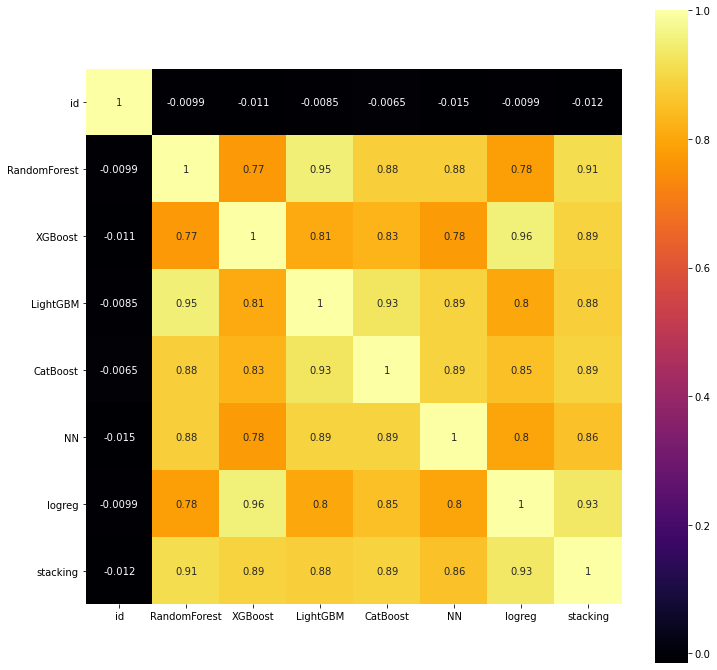

In [28]:
corr = pred_df.corr()

plt.subplots(figsize=(12,12))
sns.heatmap(corr, annot=True, square=True, cmap='inferno')

In [37]:
pred_df['pred'] = (pred_df.RandomForest * 0.01 + pred_df.XGBoost * 0.015 + pred_df.NN * 0.015
                  + pred_df.LightGBM * 0.25 + pred_df.CatBoost * 0.6 + pred_df.logreg * 0.06
                  + pred_df.stacking * 0.05)
pred_df.head(-10)

,id,RandomForest,XGBoost,LightGBM,CatBoost,NN,logreg,stacking,pred
0,0,0.653176,0.850221,0.359419,0.874176,0.835058,0.884690,0.968949,0.747700
1,1,0.074268,0.136567,0.092231,0.055457,0.099198,0.058919,0.059116,0.067102
2,2,0.039741,0.001006,0.050437,0.024032,0.048758,0.030585,0.037907,0.031902
3,3,0.002598,0.000054,0.035582,0.003217,0.007241,0.028325,0.028462,0.014084
4,4,0.092913,0.002854,0.071720,0.042077,0.070299,0.033090,0.056696,0.050023
...,...,...,...,...,...,...,...,...,...
18035,18035,0.076255,0.013287,0.078328,0.037572,0.022707,0.033253,0.055248,0.048186
18036,18036,0.054682,0.071169,0.077653,0.066366,0.059807,0.043795,0.055942,0.067169
18037,18037,0.001582,0.000357,0.034496,0.002404,0.001839,0.028221,0.028393,0.013228
18038,18038,0.030693,0.000552,0.053604,0.030467,0.009364,0.029916,0.035189,0.035691


In [38]:
now = datetime.datetime.now()

submission = pd.DataFrame({
    'ID':pred_df['id'],
    'pred':pred_df['pred']
})

file_name = 'submit/submit_' + now.strftime('%d_%H%M') + '.csv'

submission.to_csv(file_name, header=False, index=False)